In [2]:
import numpy as np
import networkx as nx

def genlaplacian(G, x, nodelist=None):
    if x==0:
        D = nx.laplacian_matrix(G).toarray()
    else:
        D = nx.floyd_warshall_numpy(G, nodelist)
        rowsize = D.shape[0]
        for i in range(0, rowsize):
            for j in range(i+1, rowsize):
                if(D[i,j] ==1):
                    D[i,j]= D[j,i] = -1
                else:
                    D[i,j] = D[j,i] = -D[i,j]*(pow(x, (D[i,j]-1)))
            D[i,i] = -1*(D[i].sum())
    return D

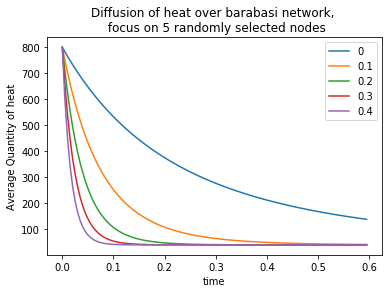

In [4]:
#for larger networks
import numpy as np
import networkx as nx
from scipy import linalg as LA
from heapq import nlargest
from operator import itemgetter
import matplotlib.pyplot as plt
#import random as random

n = 100
G = nx.barabasi_albert_graph(n, 3, seed=None)
rand_nodes = np.random.choice(G.nodes(),5)
phi_0 = [0]*n
i=0
for node in rand_nodes:
    phi_0[node]=500+i
    i=i+150

x_vals =[0,0.1,0.2,0.3,0.4]
t_vals =[]
tot_vals=[]
for x in x_vals:
    L =  genlaplacian(G,x)
    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(n,1), order='F')
    phi_0 = np.reshape(phi_0,(n,1), order='F');
    phi_0V = np.dot((V.conj().transpose()),phi_0) 
    for t in np.arange(0,0.6,0.005):               #Loop through times and decay each initial component
        Phi   = (phi_0V* (np.exp(-D*t)));                             #Exponential decay for each component
        Phi   = np.dot(V,Phi);               
        phi_t = (Phi.ravel()).tolist()
        t_vals.append(np.mean([phi_t[index] for index in rand_nodes]))
    tot_vals.append(t_vals) 
    t_vals=[]
    
for tt in tot_vals:
    plt.plot(np.arange(0,0.6,0.005),tt)
plt.xlabel('time')
plt.ylabel('Average Quantity of heat')
plt.title('Diffusion of heat over barabasi network, \n focus on 5 randomly selected nodes')
plt.legend(x_vals)
plt.show()

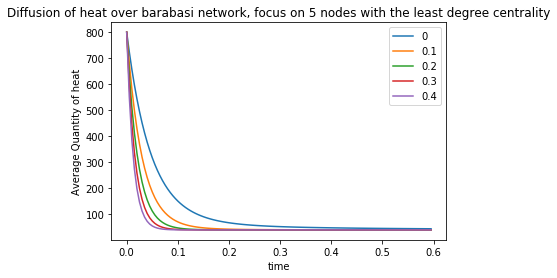

In [5]:
#for larger networks
import numpy as np
import networkx as nx
from scipy import linalg as LA
from heapq import nlargest
from operator import itemgetter
import matplotlib.pyplot as plt

n = 100
G = nx.barabasi_albert_graph(n, 3, seed=None)
dd = nx.degree_centrality(G)
degmax= dict(nlargest(5,dd.items(), key=itemgetter(1)))
phi_0 = [0]*n
keylist = list(map(int, degmax.keys()))
i=0
for key in keylist:
    phi_0[key]=500+i
    i=i+150

#x_vals = np.arange(0,0.5,0.005)
x_vals =[0,0.1,0.2,0.3,0.4]
t_vals =[]
tot_vals=[]
for x in x_vals:
    L =  genlaplacian(G,x)
    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(n,1), order='F')
    phi_0 = np.reshape(phi_0,(n,1), order='F');
    phi_0V = np.dot((V.conj().transpose()),phi_0) 
    for t in np.arange(0,0.6,0.005):               #Loop through times and decay each initial component
        Phi   = (phi_0V* (np.exp(-D*t)));                             #Exponential decay for each component
        Phi   = np.dot(V,Phi);               
        phi_t = (Phi.ravel()).tolist()
        t_vals.append(np.mean([phi_t[index] for index in keylist]))
        #t_vals.append(c)
        #c=[]
    tot_vals.append(t_vals) 
    t_vals=[]
    
for tt in tot_vals:
    plt.plot(np.arange(0,0.6,0.005),tt)
plt.xlabel('time')
plt.ylabel('Average Quantity of heat')
plt.title('Diffusion of heat over barabasi network, focus on 5 nodes with the least degree centrality')
plt.legend(x_vals)
plt.show()